# For implementing weekly calculations

In [1]:
import numpy as np 
import pandas as pd

import ExcessMortalityFunctions as emf
from importlib import reload
reload(emf)

from scipy.stats import poisson

import matplotlib.pyplot as plt


# import sys
 
# # setting path
# sys.path.append('../Functions')
# import PandemiXSignaturesForSubfolders as ps

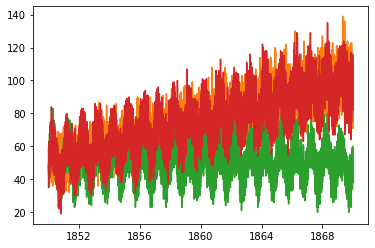

In [2]:
# Generate some data for testing
d1 = np.datetime64('1850-01-01')
d2 = np.datetime64('1870-01-01')
ts = np.arange(d1,d2)

# Constant
curMean = 50 
curBase = poisson.rvs(curMean,size = len(ts))
curBase = curMean * np.ones(len(ts))

# Linearly increasing
curMean2 = 100
allMeans = np.linspace(curMean,curMean2,len(ts))
curBase2 = poisson.rvs(allMeans,size = len(ts))

# Sinusoidal
tDays = (ts -ts[0])/np.timedelta64(1,'D')
sinAmp = 10
sinPer = 2*np.pi/365.25
curBase3 = np.round(poisson.rvs(curMean,size = len(ts)) + sinAmp * np.sin(tDays * sinPer))


# Sinusoidal and linear
tDays = (ts -ts[0])/np.timedelta64(1,'D')
sinAmp = 10
sinPer = 2*np.pi/365.25
curBase4 = np.round(poisson.rvs(allMeans,size = len(ts)) + sinAmp * np.sin(tDays * sinPer))

# Plot
fig,ax = plt.subplots()
ax.plot(ts,curBase)
ax.plot(ts,curBase2)
ax.plot(ts,curBase3)
ax.plot(ts,curBase4)


In [3]:

df = pd.DataFrame(
    index = ts,
    data={
        'Base':curBase,
        'Base2':curBase2,
        'Base3':curBase3,
        'Base4':curBase4,
        }
)

# df.plot()


# Group by week

In [21]:
%matplotlib widget

In [17]:
reload(emf)

<module 'ExcessMortalityFunctions' from 'c:\\NonSyncedFiles\\GithubRepos\\ExcessMortality\\ExcessMortalityFunctions.py'>

In [18]:
# reload(emf)
curData = df.Base 
curMean,curStd = emf.rnMean(curData,numYears=12,timeResolution='Week')
curData = emf.groupByWeek(curData)



In [19]:
# pdSeries = curData.copy()
# pdSeries = pdSeries.groupby([pdSeries.index.isocalendar().year,pdSeries.index.isocalendar().week]).sum().reset_index()
# # curData = emf.groupByWeek(curData)
# # curData

# pdSeries['Date'] = pdSeries.apply(lambda x: pd.Timestamp.fromisocalendar(int(x.year),int(x.week),1),axis=1)

# pdSeries
# # pdSeries.apply(lambda x: x.,axis=1)

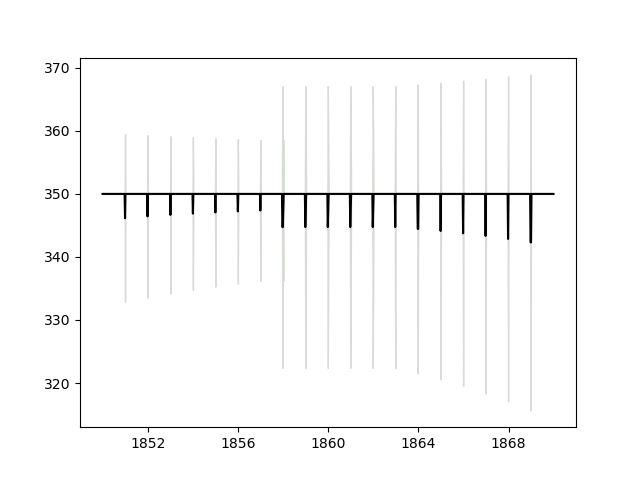

In [24]:
fig,ax = plt.subplots()

ax.plot(curMean,'k')
# ax.plot(curData,'b.-')
ax.fill_between(curMean.index,curMean-curStd,curMean+curStd,color='xkcd:light gray')

In [29]:
# pdSeries = curData 
# pdSeries = pdSeries.groupby([pdSeries.index.isocalendar().year,pdSeries.index.isocalendar().week]).sum().reset_index()

In [30]:


# pdSeries['Date'] = pdSeries.apply(lambda x: pd.Timestamp.fromisocalendar(x.year,x.week,1),axis=1)
# pdSeries = pdSeries.sort_values('Date').set_index('Date').drop(columns=['year','week']).iloc[:,0]

# pdSeries

In [31]:

        # # Group by week (using isocalendar weeks and isocalendar years)
        # serWeek = pdSeries.groupby([pdSeries.index.isocalendar().year,pdSeries.index.isocalendar().week]).sum(min_count=1)

        # # Organize as pivot table
        # curPivot = serWeek.to_frame().pivot_table(serWeek.name,index='year',columns='week')

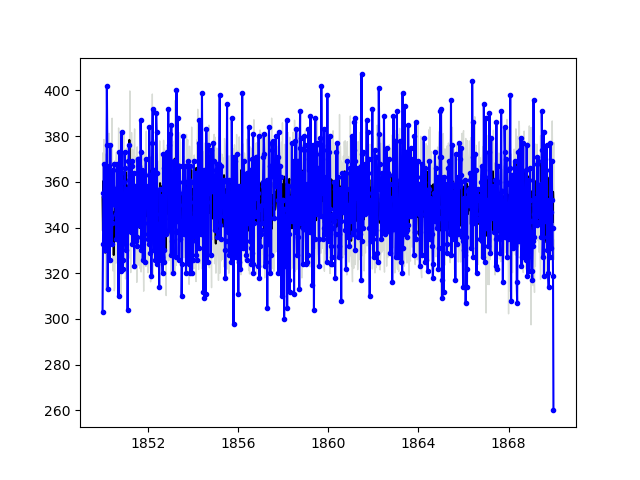

In [197]:
# # # Make some tests to ensure weekly stuff works correctly

# dw1 = np.datetime64('2022-12-23')
# dw2 = np.datetime64('2023-11-01')
# dw1 = np.datetime64('2020-12-20')
# dw2 = np.datetime64('2021-11-01')
# testDates = np.arange(dw1,dw2)

# # pd.Series(testDates).dt.week
# tdf = pd.DataFrame({'Dates':testDates})
# tdf.join(tdf.Dates.dt.isocalendar()).iloc[:20]

# # df.Base

In [198]:
pdSeries = df.Base
# pdSeries.groupby()
# curIso = pdSeries.index.isocalendar()


serWeek = pdSeries.groupby([pdSeries.index.isocalendar().year.rename('Year'),pdSeries.index.isocalendar().week.rename('Week')]).sum(min_count=1)
pivotTable = serWeek.to_frame().pivot_table(serWeek.name,index='Year',columns='Week')

In [19]:
# pivotTable[53] = pivotTable[52] 
# pivotTable

In [185]:
# pivotTable.loc[:,1:52]
# pivotTable
# pivotTable.loc[YearsWith53]

In [186]:
# Determine which years have week 53 (to remove those without)
firstDate = np.datetime64(pivotTable.index[0].astype(str)+'-01-01') # First date in first year with data
lastDate = np.datetime64((pivotTable.index[-1]+1).astype(str)+'-01-01') # First date in the next year after end of data
allIsoDF = pd.Series(np.arange(firstDate,lastDate,np.timedelta64(1,'D'))).dt.isocalendar() # Get a range of dates from the earliest possible to the last possible
YearsWith53 = allIsoDF[allIsoDF.week==53].year.unique() # Determine which years have a week 53
# lastDate
# lastDate  = pivotTable.index[0]

In [187]:
# curd1 = pdSeries.index[0]
# curd2 = pdSeries.index[-1]
# allIsoDF = pd.Series(np.arange(curd1,curd2,np.timedelta64(1,'D'))).dt.isocalendar()
# YearsWith53 = allIsoDF[allIsoDF.week==53].year.unique()

In [188]:
pivotTable = pivotTable.reset_index().melt(id_vars='Year')

In [189]:
# pivotTable = pivotTable.sort_values(['Year','Week'])

# Drop week 53 in years that did not have a week 53
pivotTable = pivotTable.drop(pivotTable[(~pivotTable.Year.isin(YearsWith53)) & (pivotTable.Week == 53)].index)

In [190]:
# pivotTable.iloc[153:]

In [195]:
# pd.Timestamp.fromisocalendar(pivotTable.Year,pivotTable.Week,np.ones(pivotTable.Week.shape))
# pd.Timestamp.fromisocalendar(2020,53,1)

# curDates = pivotTable.apply(lambda x: pd.Timestamp.fromisocalendar(x.Year,x.Week,1),axis=1)

pivotTable['Date'] = pivotTable.apply(lambda x: pd.Timestamp.fromisocalendar(x.Year,x.Week,1),axis=1)
pivotTable = pivotTable.sort_values('Date').set_index('Date').drop(columns=['Year','Week']).iloc[:,0]

Date
1849-12-31    305.0
1850-01-07    368.0
1850-01-14    318.0
1850-01-21    360.0
1850-01-28    305.0
              ...  
1869-11-29    358.0
1869-12-06    324.0
1869-12-13    336.0
1869-12-20    351.0
1869-12-27    275.0
Name: value, Length: 1044, dtype: float64